In [64]:
# 1️⃣ Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2️⃣ Load CSV from data folder (tab-separated!)
df = pd.read_csv("../data/benin.csv", sep="\t")

# 3️⃣ Check column names
print("Columns:", df.columns.tolist())

# 4️⃣ Preview first 5 rows
df.head()


Columns: ['YEAR', 'MO', 'DY', 'T2M', 'WS10M_MIN']


,YEAR,MO,DY,T2M,WS10M_MIN
0,2025,1,1,27.5,0.90
1,2025,1,2,27.98,0.78
2,2025,1,3,27.67,1.79
3,2025,1,4,27.48,2.69
4,2025,1,5,27.71,1.48


In [65]:
# Convert numeric columns
df["T2M"] = pd.to_numeric(df["T2M"], errors="coerce")  # Temperature
df["WS10M_MIN"] = pd.to_numeric(df["WS10M_MIN"], errors="coerce")  # Wind speed

# Make sure YEAR, MO, DY are integers
df["YEAR"] = df["YEAR"].astype(int)
df["MO"] = df["MO"].astype(int)
df["DY"] = df["DY"].astype(int)

# Drop rows with missing essential values
df = df.dropna(subset=["YEAR", "MO", "DY", "T2M", "WS10M_MIN"])

# Preview
df.head()


,YEAR,MO,DY,T2M,WS10M_MIN
0,2025,1,1,27.50,0.90
1,2025,1,2,27.98,0.78
2,2025,1,3,27.67,1.79
3,2025,1,4,27.48,2.69
4,2025,1,5,27.71,1.48


In [68]:
 # Create a datetime column from YEAR, MO, DY
df = pd.read_csv("../data/benin.csv", sep="\t")

# Preview columns and first 5 rows
print(df.columns.tolist())
df.head()


['YEAR', 'MO', 'DY', 'T2M', 'WS10M_MIN']


,YEAR,MO,DY,T2M,WS10M_MIN
0,2025,1,1,27.5,0.90
1,2025,1,2,27.98,0.78
2,2025,1,3,27.67,1.79
3,2025,1,4,27.48,2.69
4,2025,1,5,27.71,1.48


In [69]:
# 1️⃣ Summary statistics
print("Summary statistics:")
display(df.describe())

# 2️⃣ Missing values check
print("\nMissing values:")
print(df.isna().sum())


Summary statistics:


,YEAR,MO,DY,WS10M_MIN
count,315.0,315.000000,315.000000,314.000000
mean,2025.0,5.717460,15.374603,-7.147930
std,0.0,2.998861,8.855132,97.575238
min,2025.0,1.000000,1.000000,-999.000000
25%,2025.0,3.000000,8.000000,1.850000
50%,2025.0,6.000000,15.000000,2.600000
75%,2025.0,8.000000,23.000000,3.067500
max,2025.0,11.000000,31.000000,4.820000



Missing values:
YEAR         0
MO           0
DY           0
T2M          0
WS10M_MIN    1
dtype: int64


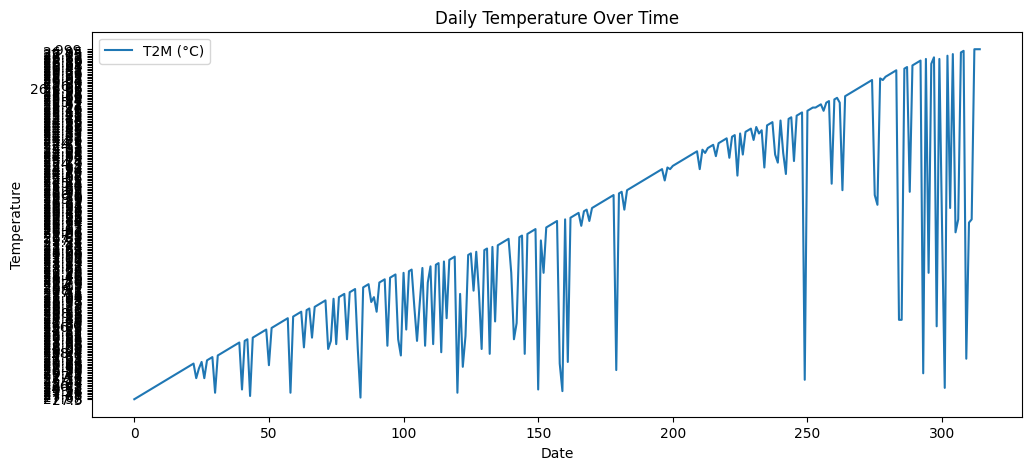

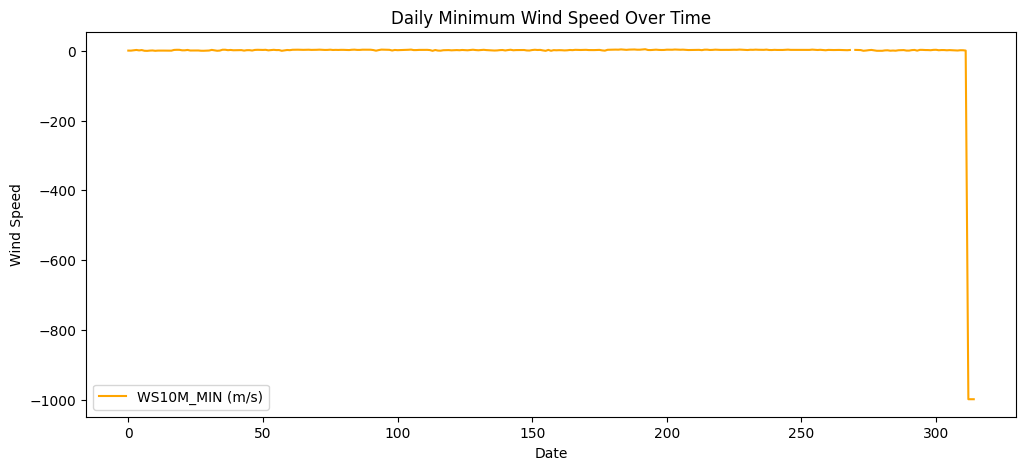

In [70]:
# Temperature over time
plt.figure(figsize=(12, 5))
plt.plot(df.index, df["T2M"], label="T2M (°C)")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.title("Daily Temperature Over Time")
plt.legend()
plt.show()

# Wind speed over time
plt.figure(figsize=(12, 5))
plt.plot(df.index, df["WS10M_MIN"], color="orange", label="WS10M_MIN (m/s)")
plt.xlabel("Date")
plt.ylabel("Wind Speed")
plt.title("Daily Minimum Wind Speed Over Time")
plt.legend()
plt.show()



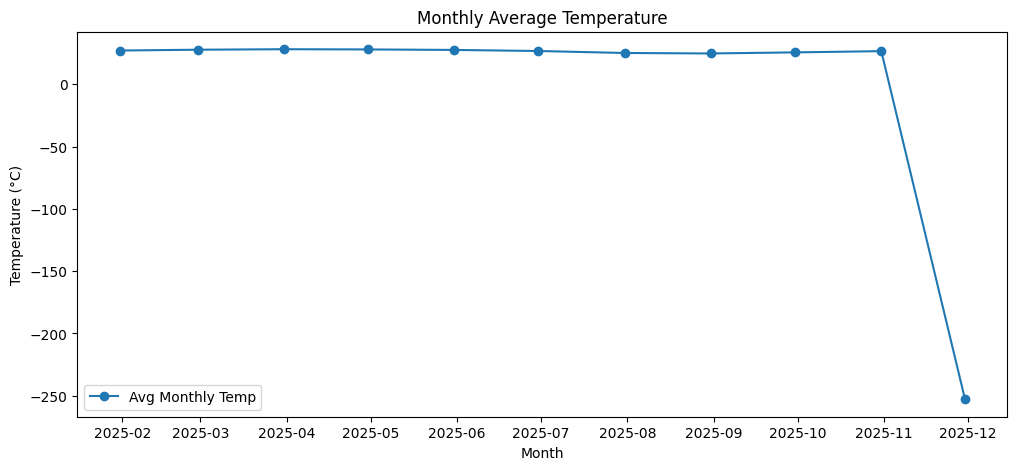

In [ ]:
# Plot monthly average temperature
plt.figure(figsize=(12, 5))
plt.plot(monthly.index, monthly["T2M"], marker="o", label="Avg Monthly Temp")
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")
plt.title("Monthly Average Temperature")
plt.legend()
plt.show()


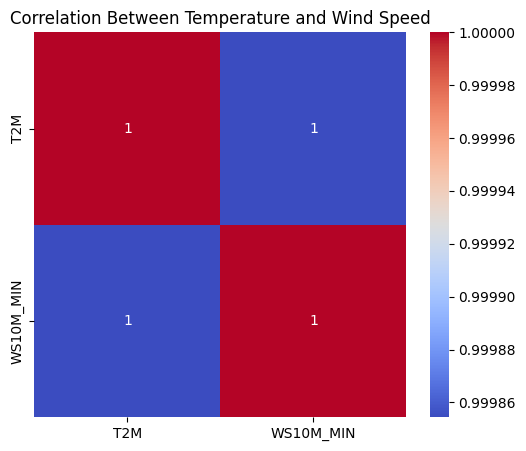

In [76]:
# Compute correlations
corr = df[["T2M", "WS10M_MIN"]].corr()

# Plot heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Between Temperature and Wind Speed")
plt.show()


In [79]:
print(df.head())
print(df.index)


            YEAR  MO  DY    T2M  WS10M_MIN
Timestamp                                 
2025-01-01  2025   1   1  27.50       0.90
2025-01-02  2025   1   2  27.98       0.78
2025-01-03  2025   1   3  27.67       1.79
2025-01-04  2025   1   4  27.48       2.69
2025-01-05  2025   1   5  27.71       1.48
DatetimeIndex(['2025-01-01', '2025-01-02', '2025-01-03', '2025-01-04',
               '2025-01-05', '2025-01-06', '2025-01-07', '2025-01-08',
               '2025-01-09', '2025-01-10',
               ...
               '2025-11-02', '2025-11-03', '2025-11-04', '2025-11-05',
               '2025-11-06', '2025-11-07', '2025-11-08', '2025-11-09',
               '2025-11-10', '2025-11-11'],
              dtype='datetime64[ns]', name='Timestamp', length=315, freq=None)


In [80]:
import pandas as pd

# Load CSV
df = pd.read_csv("../data/benin.csv", sep="\t")

# Preview
print(df.columns.tolist())
df.head()

# Info & missing values
df.info()
df.isna().sum()


['YEAR', 'MO', 'DY', 'T2M', 'WS10M_MIN']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   YEAR       315 non-null    int64  
 1   MO         315 non-null    int64  
 2   DY         315 non-null    int64  
 3   T2M        315 non-null    object 
 4   WS10M_MIN  314 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 12.4+ KB


YEAR         0
MO           0
DY           0
T2M          0
WS10M_MIN    1
dtype: int64

In [ ]:
# Outlier Detection
from scipy import stats
import numpy as np

# Z-score for T2M and WS10M_MIN
z_scores = np.abs(stats.zscore(df[["T2M", "WS10M_MIN"]]))
outliers = (z_scores > 3).any(axis=1)
print(df[outliers])

# Optionally drop outliers
df = df[~outliers]


     YEAR  MO  DY    T2M  WS10M_MIN
312  2025  11   9 -999.0     -999.0
313  2025  11  10 -999.0     -999.0
314  2025  11  11 -999.0     -999.0


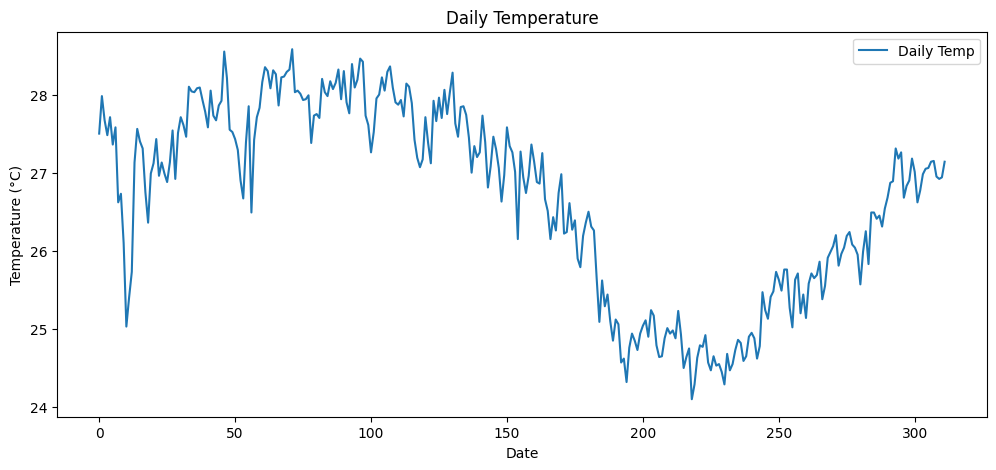

In [84]:
import matplotlib.pyplot as plt

# Daily line plot
plt.figure(figsize=(12, 5))
plt.plot(df.index, df["T2M"], label="Daily Temp")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.title("Daily Temperature")
plt.legend()
plt.show()


In [ ]:
# Save cleaned datasets:
df.to_csv("../data/benin_clean.csv", index=False)


In [ ]:
import matplotlib.pyplot as plt

# Temperature over time
plt.figure(figsize=(12, 5))
plt.plot(df_clean.index, df_clean["T2M"], label="Temperature")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.title("Daily Temperature")
plt.legend()
plt.show()

# Wind Speed over time
plt.figure(figsize=(12, 5))
plt.plot(df_clean.index, df_clean["WS10M_MIN"], label="Wind Speed", color="orange")
plt.xlabel("Date")
plt.ylabel("Wind Speed (m/s)")
plt.title("Daily Minimum Wind Speed")
plt.legend()
plt.show()
